In [2]:
from evaluate import *
from interpolate import *

In [3]:
base_folder = "Output/Reproduce_new"

# Testing the effect of modifications to flat UNet

In [3]:
for loss in ["Masked_MSELoss", "Masked_AreaWeightedMSELoss"]:
    for use_coord_conv in [True, False]:
        for use_cylindrical_padding in [True, False]:
            conditions = {
                "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                                 "prec": ["prec"]},
                                        "GRID_TYPE": "Flat",
                                        "PRECIP_WEIGHTING" : False
                                       },
                "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                              "USE_COORD_CONV": use_coord_conv,
                                              "USE_CYLINDRICAL_PADDING": use_cylindrical_padding,
                                              "LOSS": loss,
                                              "LEARNING_RATE": 1e-3,
                                              "DEPTH": 3,
                                               "FMAPS": (32,32,64,64)
                                              }
            }
            keywords_blacklist = ["RESULTS_INTERPOLATED"]
            descriptions, predictions, gt, masks = load_data_for_comparison(base_folder, conditions, keywords_blacklist=keywords_blacklist)
            r2 = np.zeros(len(predictions))
            for i in range(len(predictions)):
                r2[i] = get_weighted_average(get_r2(predictions[i], gt[i]), descriptions[i]["DATASET_DESCRIPTION"])
            print('Loss: {}, CoordConv: {}, CylindricalPadding: {}, R2 = {:.3f} +/- {:.3f}'.format(loss, use_coord_conv, use_cylindrical_padding, np.mean(r2), np.std(r2)))

10 matching runs found
Loss: Masked_MSELoss, CoordConv: True, CylindricalPadding: True, R2 = 0.375 +/- 0.005
10 matching runs found
Loss: Masked_MSELoss, CoordConv: True, CylindricalPadding: False, R2 = 0.367 +/- 0.010
10 matching runs found
Loss: Masked_MSELoss, CoordConv: False, CylindricalPadding: True, R2 = 0.357 +/- 0.015
10 matching runs found
Loss: Masked_MSELoss, CoordConv: False, CylindricalPadding: False, R2 = 0.352 +/- 0.015
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: True, CylindricalPadding: True, R2 = 0.377 +/- 0.005
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: True, CylindricalPadding: False, R2 = 0.376 +/- 0.005
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: False, CylindricalPadding: True, R2 = 0.366 +/- 0.004
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: False, CylindricalPadding: False, R2 = 0.365 +/- 0.005


# Comparing different ML methods:

Flat grid:

In [7]:
linreg_baseline_c = {
    "DATASET_DESCRIPTION": {"GRID_TYPE": "Flat",
                            "PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec']},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "LinReg_Pixelwise"}
}

randomforest_baseline_c = {
    "DATASET_DESCRIPTION": {"GRID_TYPE": "Flat",
                            "PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec']},
                            
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "RandomForest_Pixelwise"}
}

pca_baseline_c = {
    "DATASET_DESCRIPTION": {"GRID_TYPE": "Flat",
                            "PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec']},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "PCA_Flat",
                                  "REGTYPE": "linreg"}
}

unet_unmodified_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec'],
                            "GRID_TYPE": "Flat",
                            "PRECIP_WEIGHTING" : False},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": False,
                                  "USE_CYLINDRICAL_PADDING": False,
                                  "LEARNING_RATE": 1e-3,                                   
                                  "LOSS": "Masked_MSELoss"}
}

unet_modified_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec'],
                            "PRECIP_WEIGHTING" : False,
                            "GRID_TYPE": "Flat"
                                       },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LEARNING_RATE": 5e-3,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "DEPTH": 3,
                                  "FMAPS": (32,32,64,64)}
}

In [8]:
descriptions_u_u, predictions_u_u, gt_u_u, masks_u_u = load_data_for_comparison(base_folder, unet_unmodified_c, keywords_blacklist=keywords_blacklist)
descriptions_m_u, predictions_m_u, gt_m_u, masks_m_u = load_data_for_comparison(base_folder, unet_modified_c, keywords_blacklist=keywords_blacklist)
descriptions_rf, predictions_rf, gt_rf, masks_rf = load_data_for_comparison(base_folder, randomforest_baseline_c, keywords_blacklist=keywords_blacklist)

descriptions_lr, predictions_lr, gt_lr, masks_lr = load_data_for_comparison(base_folder, linreg_baseline_c, keywords_blacklist=keywords_blacklist)
descriptions_pca, predictions_pca, gt_pca, masks_pca = load_data_for_comparison(base_folder, pca_baseline_c, keywords_blacklist=keywords_blacklist)


r2_u_u = np.zeros(len(predictions_u_u))
r2_m_u = np.zeros(len(predictions_m_u))
r2_rf = np.zeros(len(predictions_rf))

r2_lr = np.zeros(len(predictions_lr))
r2_pca = np.zeros(len(predictions_pca))


for i in range(len(predictions_u_u)):
    r2_u_u[i] = get_weighted_average(get_r2(predictions_u_u[i], gt_u_u[i]), descriptions_u_u[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_m_u)):
    r2_m_u[i] = get_weighted_average(get_r2(predictions_m_u[i], gt_m_u[i]), descriptions_m_u[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_rf)):
    r2_rf[i] = get_weighted_average(get_r2(predictions_rf[i], gt_rf[i]), descriptions_rf[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_lr)):
    r2_lr[i] = get_weighted_average(get_r2(predictions_lr[i], gt_lr[i]), descriptions_lr[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_pca)):
    r2_pca[i] = get_weighted_average(get_r2(predictions_pca[i], gt_pca[i]), descriptions_pca[i]["DATASET_DESCRIPTION"])


print(r"Unmodified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_u_u), np.std(r2_u_u)))
print(r"Modified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_m_u), np.std(r2_m_u)))
print(r"Random Forest: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_rf), np.std(r2_rf)))

print(r"Pixelwise Linear regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_lr), np.std(r2_lr)))
print(r"PCA Regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_pca), np.std(r2_pca)))

10 matching runs found
10 matching runs found
1 matching runs found
1 matching runs found
1 matching runs found
Unmodified UNet: $R2 = 0.352 \pm 0.015$
Modified UNet: $R2 = 0.377 \pm 0.005$
Random Forest: $R2 = 0.212 \pm 0.000$
Pixelwise Linear regression: $R2 = 0.251 \pm 0.000$
PCA Regression: $R2 = 0.303 \pm 0.000$


icosahedral grid:

In [9]:
ico_baseline_c = {
    "DATASET_DESCRIPTION": {"GRID_TYPE": "Ico",},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "PCA_Ico",
                                  "REGTYPE": "linreg"}
}

ico_unet_c = {
    "DATASET_DESCRIPTION": {"GRID_TYPE": "Ico",
                            "PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                                 "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False
                                       },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Ico"}
}

In [10]:
descriptions_ico_unet, predictions_ico_unet, gt_ico_unet, masks_ico_unet = load_data_for_comparison(base_folder, ico_unet_c)
descriptions_ico_bl, predictions_ico_bl, gt_ico_bl, masks_ico_bl = load_data_for_comparison(base_folder, ico_baseline_c)

r2_ico_unet = np.zeros(len(predictions_ico_unet))
r2_ico_bl = np.zeros(len(predictions_ico_bl))

for i in range(len(predictions_ico_unet)):
    r2_ico_unet[i] = np.mean(get_r2(predictions_ico_unet[i], gt_ico_unet[i]), axis=(1,2))

for i in range(len(predictions_ico_bl)):
    r2_ico_bl[i] = np.mean(get_r2(predictions_ico_bl[i], gt_ico_bl[i]), axis=(1,2))
    
print('Ico Unet: R2 = {:.3f} +/- {:.3f}'.format(np.mean(r2_ico_unet), np.std(r2_ico_unet)))
print('Ico Baseline: R2 = {:.3f} +/- {:.3f}'.format(np.mean(r2_ico_bl), np.std(r2_ico_bl)))

10 matching runs found
1 matching runs found
Ico Unet: R2 = 0.396 +/- 0.009
Ico Baseline: R2 = 0.339 +/- 0.000


Flat interpolated to icosahedral grid:

In [11]:
data_u_u = []
gt_u_u = []

for i in range(len(descriptions_u_u)):
    data, gt = get_interpolated_data_and_gt(descriptions_u_u[i], predictions_u_u[i], output_folder=base_folder, 
                                            script_folder="Scripts/", do_scaling=False)
    data_u_u.append(data)
    gt_u_u.append(gt)

data_m_u = []
gt_m_u = []

for i in range(len(descriptions_m_u)):
    data, gt = get_interpolated_data_and_gt(descriptions_m_u[i], predictions_m_u[i], output_folder=base_folder, 
                                            script_folder="Scripts/", print_folder_names=True, do_scaling=False)
    data_m_u.append(data)
    gt_m_u.append(gt)
    
data_rf = []
gt_rf = []

for i in range(len(descriptions_rf)):
    data, gt = get_interpolated_data_and_gt(descriptions_rf[i], predictions_rf[i], output_folder=base_folder, 
                                            script_folder="Scripts/", print_folder_names=True, do_scaling=False)
    data_rf.append(data)
    gt_rf.append(gt)
    
data_lr = []
gt_lr = []

for i in range(len(descriptions_lr)):
    data, gt = get_interpolated_data_and_gt(descriptions_lr[i], predictions_lr[i], output_folder=base_folder, 
                                            script_folder="Scripts/", print_folder_names=True, do_scaling=False)
    data_lr.append(data)
    gt_lr.append(gt)
    
data_pca = []
gt_pca = []

for i in range(len(descriptions_pca)):
    data, gt = get_interpolated_data_and_gt(descriptions_pca[i], predictions_pca[i], output_folder=base_folder, 
                                            script_folder="Scripts/", print_folder_names=True, do_scaling=False)
    data_pca.append(data)
    gt_pca.append(gt)

OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
OSError: Probably CDO is not

In [12]:
r2_u_u = np.zeros(len(data_u_u))
r2_m_u = np.zeros(len(data_m_u))
r2_rf = np.zeros(len(data_rf))

r2_lr = np.zeros(len(data_lr))
r2_pca = np.zeros(len(data_pca))


for i in range(len(predictions_u_u)):
    r2_u_u[i] = np.mean(get_r2(data_u_u[i], gt_u_u[i]), axis=(1,2))

for i in range(len(predictions_m_u)):
    r2_m_u[i] = np.mean(get_r2(data_m_u[i], gt_m_u[i]), axis=(1,2))
    
for i in range(len(predictions_rf)):
    r2_rf[i] = np.mean(get_r2(data_rf[i], gt_rf[i]), axis=(1,2))
    
for i in range(len(predictions_lr)):
    r2_lr[i] = np.mean(get_r2(data_lr[i], gt_lr[i]), axis=(1,2))
    
for i in range(len(predictions_pca)):
    r2_pca[i] = np.mean(get_r2(data_pca[i], gt_pca[i]), axis=(1,2))


print(r"Unmodified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_u_u), np.std(r2_u_u)))
print(r"Modified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_m_u), np.std(r2_m_u)))
print(r"Random Forest: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_rf), np.std(r2_rf)))

print(r"Pixelwise Linear regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_lr), np.std(r2_lr)))
print(r"PCA Regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_pca), np.std(r2_pca)))

Unmodified UNet: $R2 = 0.374 \pm 0.017$
Modified UNet: $R2 = 0.402 \pm 0.006$
Random Forest: $R2 = 0.256 \pm 0.000$
Pixelwise Linear regression: $R2 = 0.274 \pm 0.000$
PCA Regression: $R2 = 0.332 \pm 0.000$


Icosahedral interpolated to flat grid:

In [13]:
data_ico_bl = []
gt_ico_bl = []

for i in range(len(descriptions_ico_bl)):
    data, gt = get_interpolated_data_and_gt(descriptions_ico_bl[i], predictions_ico_bl[i], output_folder=base_folder, 
                                            script_folder="Scripts/", do_scaling=False)
    data_ico_bl.append(data)
    gt_ico_bl.append(gt)

data_ico_unet = []
gt_ico_unet = []

for i in range(len(descriptions_m_u)):
    data, gt = get_interpolated_data_and_gt(descriptions_ico_unet[i], predictions_ico_unet[i], output_folder=base_folder, 
                                            script_folder="Scripts/", do_scaling=False)
    data_ico_unet.append(data)
    gt_ico_unet.append(gt)

OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated res

In [14]:
r2_ico_bl = np.zeros(len(data_ico_bl))
r2_ico_unet = np.zeros(len(data_ico_unet))

for i in range(len(data_ico_bl)):
    r2_ico_bl[i] = get_weighted_average(get_r2(data_ico_bl[i], gt_ico_bl[i]), descriptions_lr[0]["DATASET_DESCRIPTION"])

for i in range(len(data_ico_unet)):
    r2_ico_unet[i] = get_weighted_average(get_r2(data_ico_unet[i], gt_ico_unet[i]), descriptions_lr[0]["DATASET_DESCRIPTION"])
    

print(r"Ico baseline, flat grid: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_ico_bl), np.std(r2_ico_bl)))
print(r"Ico UNet, flat grid: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_ico_unet), np.std(r2_ico_unet)))

Ico baseline, flat grid: $R2 = 0.076 \pm 0.000$
Ico UNet, flat grid: $R2 = 0.126 \pm 0.011$


# Comparing different predictor variables

In [15]:
# predictor variables:
conditions_tas = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

conditions_pr = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

"""
# all of these are no longer used, because slp and oro are not available in all climate model data sets.
conditions_slp = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

conditions_tps = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                   "FMAPS": (32,32,64,64)
                                  }
}

conditions_tpo = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "oro": ["ht"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}
"""

descriptions_tas, predictions_tas, gt_tas, masks_tas = load_data_for_comparison(base_folder, conditions_tas)
descriptions_pr, predictions_pr, gt_pr, masks_pr = load_data_for_comparison(base_folder, conditions_pr)
# descriptions_slp, predictions_slp, gt_slp, masks_slp = load_data_for_comparison(base_folder, conditions_slp)
# descriptions_tps, predictions_tps, gt_tps, masks_tps = load_data_for_comparison(base_folder, conditions_tps)
# descriptions_tpo, predictions_tpo, gt_tpo, masks_tpo = load_data_for_comparison(base_folder, conditions_tpo)

r2_tas = np.zeros(len(predictions_tas))
r2_pr = np.zeros(len(predictions_pr))
# r2_slp = np.zeros(len(predictions_slp))
# r2_tps = np.zeros(len(predictions_tps))
# r2_tpo = np.zeros(len(predictions_tpo))

for i in range(len(predictions_tas)):
    r2_tas[i] = get_weighted_average(get_r2(predictions_tas[i], gt_tas[i]), descriptions_tas[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_pr)):
    r2_pr[i] = get_weighted_average(get_r2(predictions_pr[i], gt_pr[i]), descriptions_pr[i]["DATASET_DESCRIPTION"])
    
# for i in range(len(predictions_slp)):
#     r2_slp[i] = get_weighted_average(get_r2(predictions_slp[i], gt_slp[i]), descriptions_slp[i]["DATASET_DESCRIPTION"])
    
# for i in range(len(predictions_tps)):
#     r2_tps[i] = get_weighted_average(get_r2(predictions_tps[i], gt_tps[i]), descriptions_tps[i]["DATASET_DESCRIPTION"])
    
# for i in range(len(predictions_tpo)):
#     r2_tpo[i] = get_weighted_average(get_r2(predictions_tpo[i], gt_tpo[i]), descriptions_tpo[i]["DATASET_DESCRIPTION"])
    
print('Tas: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tas), np.std(r2_tas)))
print('Precip: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_pr), np.std(r2_pr)))
# print('Slp: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_slp), np.std(r2_slp)))
# print('Tas, precip, slp: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tps), np.std(r2_tps)))
# print('Tas, precip, oro: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tpo), np.std(r2_tpo)))

10 matching runs found
10 matching runs found
Tas: R2 = 0.251 \pm 0.004
Precip: R2 = 0.327 \pm 0.006


# Hyperparameter tuning

In [16]:
conditions_wider = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                   "FMAPS": (64,64,128,128)
                                  }
}

conditions_deeper = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 4
                                  }
}

descriptions_deeper, predictions_deeper, gt_deeper, masks_deeper = load_data_for_comparison(base_folder, conditions_deeper)
descriptions_wider, predictions_wider, gt_wider, masks_wider = load_data_for_comparison(base_folder, conditions_wider)

r2_deeper = np.zeros(len(predictions_deeper))
r2_wider = np.zeros(len(predictions_wider))

for i in range(len(predictions_deeper)):
    r2_deeper[i] = get_weighted_average(get_r2(predictions_deeper[i], gt_deeper[i]), descriptions_deeper[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_wider)):
    r2_wider[i] = get_weighted_average(get_r2(predictions_wider[i], gt_wider[i]), descriptions_wider[i]["DATASET_DESCRIPTION"])
    
print('Deeper: R2 = {:.3f} +/- {:.3f}'.format(np.mean(r2_deeper), np.std(r2_deeper)))
print('Wider: R2 = {:.3f} +/- {:.3f}'.format(np.mean(r2_wider), np.std(r2_wider)))

10 matching runs found
10 matching runs found
Deeper: R2 = 0.386 +/- 0.008
Wider: R2 = 0.389 +/- 0.006


### learning rate tuning:

In [ ]:
conditions_lrs = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False,
                            "GRID_TYPE": "Flat"
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "DEPTH": 3
                                  }
}

descriptions_lrs, predictions_lrs, gt_lrs, masks_lrs = load_data_for_comparison(base_folder, conditions_lrs, keywords_blacklist=keywords_blacklist)

46 matching runs found


In [75]:
r2_lrs = np.zeros(len(predictions_lrs))

for i in range(len(predictions_lrs)):
    r2_lrs[i] = get_weighted_average(get_r2(predictions_lrs[i], gt_lrs[i]), descriptions_lrs[i]["DATASET_DESCRIPTION"])

lr: 0.0001 R2 = 0.352 +/- 0.004
lr: 0.0001438449888287663 R2 = 0.357 +/- 0.005
lr: 0.00020691380811147902 R2 = 0.362 +/- 0.005
lr: 0.00029763514416313193 R2 = 0.365 +/- 0.002
lr: 0.00042813323987193956 R2 = 0.369 +/- 0.005
lr: 0.0006158482110660267 R2 = 0.376 +/- 0.001
lr: 0.0008858667904100823 R2 = 0.377 +/- 0.008
lr: 0.0012742749857031334 R2 = 0.379 +/- 0.002
lr: 0.0018329807108324356 R2 = 0.386 +/- 0.003
lr: 0.0026366508987303583 R2 = 0.382 +/- 0.001
lr: 0.00379269019073225 R2 = 0.382 +/- 0.007
lr: 0.005455594781168515 R2 = 0.381 +/- 0.009
lr: 0.007847599703514606 R2 = 0.382 +/- 0.003
lr: 0.011288378916846883 R2 = 0.385 +/- 0.001
lr: 0.01623776739188721 R2 = 0.374 +/- 0.000
lr: 0.023357214690901212 R2 = nan +/- nan
lr: 0.03359818286283781 R2 = nan +/- nan
lr: 0.04832930238571752 R2 = nan +/- nan
lr: 0.06951927961775606 R2 = nan +/- nan
lr: 0.1 R2 = nan +/- nan


C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$R^2$ score')

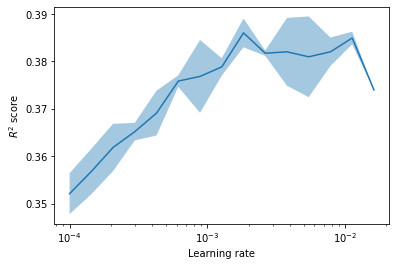

In [76]:
import matplotlib.pyplot as plt
lrs = [d["MODEL_TRAINING_DESCRIPTION"]["LEARNING_RATE"] for d in descriptions_lrs]

r2_lrs_mean = []
r2_lrs_std = []

ls = np.logspace(-4,-1,20)
for i, l in enumerate(ls):
    indices = np.where(l==lrs)[0]
    print('lr: {} R2 = {:.3f} +/- {:.3f}'.format(l, np.mean(r2_lrs[indices]), np.std(r2_lrs[indices])))
    r2_lrs_mean.append(np.mean(r2_lrs[indices]))
    r2_lrs_std.append(np.std(r2_lrs[indices]))
    
r2_lrs_mean = np.array(r2_lrs_mean)
r2_lrs_std = np.array(r2_lrs_std)

plt.plot(ls, r2_lrs_mean)
plt.fill_between(ls, r2_lrs_mean-r2_lrs_std, r2_lrs_mean+r2_lrs_std, alpha=0.4)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel(r"$R^2$ score")

# Precipitation weighting

In [20]:
conditions_pw = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING" : True},
    "MODEL_TRAINING_DESCRIPTION": {}
}

conditions_no_pw = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False,
                            "GRID_TYPE": "Flat"},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                  "FMAPS": (32,32,64,64)
                                  }
}

descriptions_pw, predictions_pw, gt_pw, masks_pw = load_data_for_comparison(base_folder, conditions_pw)
descriptions_no_pw, predictions_no_pw, gt_no_pw, masks_no_pw = load_data_for_comparison(base_folder, conditions_no_pw, keywords_blacklist=keywords_blacklist)

r2_pw = np.zeros(len(predictions_pw))
r2_no_pw = np.zeros(len(predictions_no_pw))

for i in range(len(predictions_pw)):
    r2_pw[i] = get_weighted_average(get_r2(predictions_pw[i], gt_pw[i]), descriptions_pw[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_no_pw)):
    r2_no_pw[i] = get_weighted_average(get_r2(predictions_no_pw[i], gt_no_pw[i]), descriptions_no_pw[i]["DATASET_DESCRIPTION"])
    
print('No precip weighting: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_no_pw), np.std(r2_no_pw)))
print('Precip weighting: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_pw), np.std(r2_pw)))

10 matching runs found
10 matching runs found
No precip weighting: R2 = 0.377 \pm 0.005
Precip weighting: R2 = 0.416 \pm 0.004


### Interpolate groundtruth Flat->Ico->Flat

To demonstrate that the comparatively bad performance of the icosahedral UNet on the flat grid is mostly due to interpolation artifacts, we do the following: We interpolate the predictions of a flat UNet network to the icosahedral grid and back to the flat grid.

In [21]:
gt_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "DATASETS_NO_GAPS": ['isotopes', 'tsurf', 'prec'],
                            "GRID_TYPE": "Flat",
                            "PRECIP_WEIGHTING" : False},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": False,
                                  "USE_CYLINDRICAL_PADDING": False,
                                  "LEARNING_RATE": 5e-3,                                   
                                  "LOSS": "Masked_MSELoss"}
}
descriptions_flat, predictions_flat, gt_flat, masks_flat = load_data_for_comparison(base_folder, gt_c, keywords_blacklist=["RESULTS_INTERPOLATED"])

10 matching runs found


In [22]:
data_l = []
gt_l = []

for i in range(len(descriptions_flat)):
    data, gt = get_interpolated_data_and_gt(descriptions_flat[i], gt_flat[i], output_folder=base_folder, 
                                            script_folder="Scripts/", do_scaling=False, print_folder_names=True)
    data_l.append(data)
    gt_l.append(gt)

OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
Output/Reproduce_new\f58b0b708787c6906882857c7c3ada0cc8df3a3a2a798f0471e383386859\predictions.gz
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
Output/Reproduce_new\f58b0b708787c6906882857c7c3ada2f1d2e4c5f4d251e3c041ae24d8712\predictions.gz
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
Output/Reproduce_new\f58b0b708787c6906882857c7c3ada629092eb06efbfc80f4f095210d896\predictions.gz
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
Output/Reproduce_new\f58b0b708787c6906882857c7c3ada6f13a68c321a47247432909ca13e42\predictions.gz
1 matching runs found
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
Output/Reproduce_new\f58b0b708787c6906882857c7c3ada723b02705ae6c6b3abf404455966ee\predictions.

In [23]:
gt_c = {
    "DATASET_DESCRIPTION": {"RESULTS_INTERPOLATED": True,
                            "RESULTS_RESCALED": False,
                            "GRID_TYPE": "Ico"},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                    "USE_CYLINDRICAL_PADDING": True
                                  }
}

In [24]:
descriptions_interp, predictions_interp, gt_interp, masks_interp = load_data_for_comparison(base_folder, gt_c)

10 matching runs found


In [25]:
# do second interpolation:

data_r = []
gt_r = []

for i in range(len(descriptions_interp)):
    data, gt = get_interpolated_data_and_gt(descriptions_interp[i], predictions_interp[i], output_folder=base_folder, 
                                            script_folder="Scripts/", do_scaling=False)
    data_r.append(data)
    gt_r.append(gt)

OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated results.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.
OSError: Probably CDO is not installed. Test if we have exiting interpolated res

In [26]:
r2_r = np.zeros(len(data_r))

for i in range(len(data_r)):
    r2_r[i] = get_weighted_average(get_r2(data_r[i], gt_r[i]), descriptions_interp[i]["DATASET_DESCRIPTION"])  # need a dataset description of a flat grid.

    
print('Twice interpolated: R2 = {:.3f} +/- {:.3f}'.format(np.mean(r2_r), np.std(r2_r)))

Twice interpolated: R2 = 0.130 +/- 0.011
